# GOAL: Create a master census tract file made up only of census tracts with common boundaries across all years

### STEP 1: import libraries and prepare the data

In [1]:
#Libraries
import geopandas as gpd
import numpy as np
import pandas as pd

#Read in data
#SHP 1990, 2000, 2010 (and 2015)
shp1990 = gpd.read_file('C:/Users/mstuhlm1/Dropbox/Envt Gentrification/Data/Census/1990/SHP/census1990.shp')
shp2000 = gpd.read_file('C:/Users/mstuhlm1/Dropbox/Envt Gentrification/Data/Census/2000/SHP/census2000.shp')
shp2010 = gpd.read_file('C:/Users/mstuhlm1/Dropbox/Envt Gentrification/Data/Census/2010/SHP/census2010.shp')
shp2015 = gpd.read_file('C:/Users/mstuhlm1/Dropbox/Envt Gentrification/Data/Census/2015/SHP/census2015.shp')

chicago = gpd.read_file('C:/Users/mstuhlm1/Dropbox/Envt Gentrification/Data/ChicagoBoundaries/geo_export_ec26e5d3-be74-418b-a9b1-99fad21daba3.shp')

In [2]:
#Check projections
print(shp1990.crs)
print(shp2000.crs)
print(shp2010.crs)
print(shp2015.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]
PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitud

### STEP 2: create clusters and combine data

In [2]:
#Makes distance matrix
big_df = gpd.GeoDataFrame()
all_dfs = [shp1990, shp2000, shp2010, shp2015]
#all_dfs = [shp1990, shp2000]
#all_dfs = [shp1990, shp2000, shp2015]
for df in all_dfs:
    print(df.index)
    big_df = big_df.append(df, ignore_index=True)
len(big_df.index)
# Optimized Version
def contains(track1, track2):
    '''
    Assumes track1 and track2 are just the geometries
    '''
    if(track1.intersects(track2)):
        intersection = track1.intersection(track2)
        return intersection.area/track1.area
    else:
        return 0


ious = np.zeros((len(big_df.index), len(big_df.index)))
just_geos = big_df['geometry'].values

for i, row_i in enumerate(just_geos):
    print(i, '/', len(big_df.index))
    for j, row_j in enumerate(just_geos):
        if(i != j):
            ious[i, j] = contains(row_i, row_j)

RangeIndex(start=0, stop=929, step=1)
RangeIndex(start=0, stop=930, step=1)
RangeIndex(start=0, stop=873, step=1)
RangeIndex(start=0, stop=873, step=1)
0 / 3605
1 / 3605
2 / 3605
3 / 3605
4 / 3605
5 / 3605
6 / 3605
7 / 3605
8 / 3605
9 / 3605
10 / 3605
11 / 3605
12 / 3605
13 / 3605
14 / 3605
15 / 3605
16 / 3605
17 / 3605
18 / 3605
19 / 3605
20 / 3605
21 / 3605
22 / 3605
23 / 3605
24 / 3605
25 / 3605
26 / 3605
27 / 3605
28 / 3605
29 / 3605
30 / 3605
31 / 3605
32 / 3605
33 / 3605
34 / 3605
35 / 3605
36 / 3605
37 / 3605
38 / 3605
39 / 3605
40 / 3605
41 / 3605
42 / 3605
43 / 3605
44 / 3605
45 / 3605
46 / 3605
47 / 3605
48 / 3605
49 / 3605
50 / 3605
51 / 3605
52 / 3605
53 / 3605
54 / 3605
55 / 3605
56 / 3605
57 / 3605
58 / 3605
59 / 3605
60 / 3605
61 / 3605
62 / 3605
63 / 3605
64 / 3605
65 / 3605
66 / 3605
67 / 3605
68 / 3605
69 / 3605
70 / 3605
71 / 3605
72 / 3605
73 / 3605
74 / 3605
75 / 3605
76 / 3605
77 / 3605
78 / 3605
79 / 3605
80 / 3605
81 / 3605
82 / 3605
83 / 3605
84 / 3605
85 / 360

747 / 3605
748 / 3605
749 / 3605
750 / 3605
751 / 3605
752 / 3605
753 / 3605
754 / 3605
755 / 3605
756 / 3605
757 / 3605
758 / 3605
759 / 3605
760 / 3605
761 / 3605
762 / 3605
763 / 3605
764 / 3605
765 / 3605
766 / 3605
767 / 3605
768 / 3605
769 / 3605
770 / 3605
771 / 3605
772 / 3605
773 / 3605
774 / 3605
775 / 3605
776 / 3605
777 / 3605
778 / 3605
779 / 3605
780 / 3605
781 / 3605
782 / 3605
783 / 3605
784 / 3605
785 / 3605
786 / 3605
787 / 3605
788 / 3605
789 / 3605
790 / 3605
791 / 3605
792 / 3605
793 / 3605
794 / 3605
795 / 3605
796 / 3605
797 / 3605
798 / 3605
799 / 3605
800 / 3605
801 / 3605
802 / 3605
803 / 3605
804 / 3605
805 / 3605
806 / 3605
807 / 3605
808 / 3605
809 / 3605
810 / 3605
811 / 3605
812 / 3605
813 / 3605
814 / 3605
815 / 3605
816 / 3605
817 / 3605
818 / 3605
819 / 3605
820 / 3605
821 / 3605
822 / 3605
823 / 3605
824 / 3605
825 / 3605
826 / 3605
827 / 3605
828 / 3605
829 / 3605
830 / 3605
831 / 3605
832 / 3605
833 / 3605
834 / 3605
835 / 3605
836 / 3605
837 / 3605

1457 / 3605
1458 / 3605
1459 / 3605
1460 / 3605
1461 / 3605
1462 / 3605
1463 / 3605
1464 / 3605
1465 / 3605
1466 / 3605
1467 / 3605
1468 / 3605
1469 / 3605
1470 / 3605
1471 / 3605
1472 / 3605
1473 / 3605
1474 / 3605
1475 / 3605
1476 / 3605
1477 / 3605
1478 / 3605
1479 / 3605
1480 / 3605
1481 / 3605
1482 / 3605
1483 / 3605
1484 / 3605
1485 / 3605
1486 / 3605
1487 / 3605
1488 / 3605
1489 / 3605
1490 / 3605
1491 / 3605
1492 / 3605
1493 / 3605
1494 / 3605
1495 / 3605
1496 / 3605
1497 / 3605
1498 / 3605
1499 / 3605
1500 / 3605
1501 / 3605
1502 / 3605
1503 / 3605
1504 / 3605
1505 / 3605
1506 / 3605
1507 / 3605
1508 / 3605
1509 / 3605
1510 / 3605
1511 / 3605
1512 / 3605
1513 / 3605
1514 / 3605
1515 / 3605
1516 / 3605
1517 / 3605
1518 / 3605
1519 / 3605
1520 / 3605
1521 / 3605
1522 / 3605
1523 / 3605
1524 / 3605
1525 / 3605
1526 / 3605
1527 / 3605
1528 / 3605
1529 / 3605
1530 / 3605
1531 / 3605
1532 / 3605
1533 / 3605
1534 / 3605
1535 / 3605
1536 / 3605
1537 / 3605
1538 / 3605
1539 / 3605
1540

2144 / 3605
2145 / 3605
2146 / 3605
2147 / 3605
2148 / 3605
2149 / 3605
2150 / 3605
2151 / 3605
2152 / 3605
2153 / 3605
2154 / 3605
2155 / 3605
2156 / 3605
2157 / 3605
2158 / 3605
2159 / 3605
2160 / 3605
2161 / 3605
2162 / 3605
2163 / 3605
2164 / 3605
2165 / 3605
2166 / 3605
2167 / 3605
2168 / 3605
2169 / 3605
2170 / 3605
2171 / 3605
2172 / 3605
2173 / 3605
2174 / 3605
2175 / 3605
2176 / 3605
2177 / 3605
2178 / 3605
2179 / 3605
2180 / 3605
2181 / 3605
2182 / 3605
2183 / 3605
2184 / 3605
2185 / 3605
2186 / 3605
2187 / 3605
2188 / 3605
2189 / 3605
2190 / 3605
2191 / 3605
2192 / 3605
2193 / 3605
2194 / 3605
2195 / 3605
2196 / 3605
2197 / 3605
2198 / 3605
2199 / 3605
2200 / 3605
2201 / 3605
2202 / 3605
2203 / 3605
2204 / 3605
2205 / 3605
2206 / 3605
2207 / 3605
2208 / 3605
2209 / 3605
2210 / 3605
2211 / 3605
2212 / 3605
2213 / 3605
2214 / 3605
2215 / 3605
2216 / 3605
2217 / 3605
2218 / 3605
2219 / 3605
2220 / 3605
2221 / 3605
2222 / 3605
2223 / 3605
2224 / 3605
2225 / 3605
2226 / 3605
2227

2832 / 3605
2833 / 3605
2834 / 3605
2835 / 3605
2836 / 3605
2837 / 3605
2838 / 3605
2839 / 3605
2840 / 3605
2841 / 3605
2842 / 3605
2843 / 3605
2844 / 3605
2845 / 3605
2846 / 3605
2847 / 3605
2848 / 3605
2849 / 3605
2850 / 3605
2851 / 3605
2852 / 3605
2853 / 3605
2854 / 3605
2855 / 3605
2856 / 3605
2857 / 3605
2858 / 3605
2859 / 3605
2860 / 3605
2861 / 3605
2862 / 3605
2863 / 3605
2864 / 3605
2865 / 3605
2866 / 3605
2867 / 3605
2868 / 3605
2869 / 3605
2870 / 3605
2871 / 3605
2872 / 3605
2873 / 3605
2874 / 3605
2875 / 3605
2876 / 3605
2877 / 3605
2878 / 3605
2879 / 3605
2880 / 3605
2881 / 3605
2882 / 3605
2883 / 3605
2884 / 3605
2885 / 3605
2886 / 3605
2887 / 3605
2888 / 3605
2889 / 3605
2890 / 3605
2891 / 3605
2892 / 3605
2893 / 3605
2894 / 3605
2895 / 3605
2896 / 3605
2897 / 3605
2898 / 3605
2899 / 3605
2900 / 3605
2901 / 3605
2902 / 3605
2903 / 3605
2904 / 3605
2905 / 3605
2906 / 3605
2907 / 3605
2908 / 3605
2909 / 3605
2910 / 3605
2911 / 3605
2912 / 3605
2913 / 3605
2914 / 3605
2915

3518 / 3605
3519 / 3605
3520 / 3605
3521 / 3605
3522 / 3605
3523 / 3605
3524 / 3605
3525 / 3605
3526 / 3605
3527 / 3605
3528 / 3605
3529 / 3605
3530 / 3605
3531 / 3605
3532 / 3605
3533 / 3605
3534 / 3605
3535 / 3605
3536 / 3605
3537 / 3605
3538 / 3605
3539 / 3605
3540 / 3605
3541 / 3605
3542 / 3605
3543 / 3605
3544 / 3605
3545 / 3605
3546 / 3605
3547 / 3605
3548 / 3605
3549 / 3605
3550 / 3605
3551 / 3605
3552 / 3605
3553 / 3605
3554 / 3605
3555 / 3605
3556 / 3605
3557 / 3605
3558 / 3605
3559 / 3605
3560 / 3605
3561 / 3605
3562 / 3605
3563 / 3605
3564 / 3605
3565 / 3605
3566 / 3605
3567 / 3605
3568 / 3605
3569 / 3605
3570 / 3605
3571 / 3605
3572 / 3605
3573 / 3605
3574 / 3605
3575 / 3605
3576 / 3605
3577 / 3605
3578 / 3605
3579 / 3605
3580 / 3605
3581 / 3605
3582 / 3605
3583 / 3605
3584 / 3605
3585 / 3605
3586 / 3605
3587 / 3605
3588 / 3605
3589 / 3605
3590 / 3605
3591 / 3605
3592 / 3605
3593 / 3605
3594 / 3605
3595 / 3605
3596 / 3605
3597 / 3605
3598 / 3605
3599 / 3605
3600 / 3605
3601

In [3]:
#Determines connectivity
import networkx as nx

from shapely.geometry import Polygon
from shapely.ops import cascaded_union

aff_matrix = ious > 0.5
graph = nx.Graph(aff_matrix)
connected = nx.connected_components(graph)
print(connected)

#for idx, cluster in enumerate(connected):
#    #if(len(list(cluster)) > 10):
#    print(idx, cluster)
#    big_df.loc[list(cluster), 'geometry'].boundary.plot()
    
#    cluster_df = big_df.loc[list(cluster)]
    
#    #for each cluster take the union of all polygons and sum the census data
#    combine = gpd.GeoSeries(cascaded_union(cluster_df['geometry']))
#    combine.boundary.plot()
    
#after the loop, run some sort of spatial cleaning rules to make sure no polygons overlap      


<generator object connected_components at 0x000001E388C1FF20>


In [4]:
# Iterate over each cluster, make the best_year megatracts, and add in yearly census data
target_time = '2006-2010'
megatract_DF = gpd.GeoDataFrame()

for idx, cluster in enumerate(connected):
    #if(len(list(cluster)) > 10):
    print(idx, cluster)
    #big_df.loc[list(cluster), 'geometry'].boundary.plot()
    
    cluster_df = big_df.loc[list(cluster)]
    target_year_cluster = cluster_df[cluster_df['YEAR'] == target_time]
    
    if(len(target_year_cluster) > 0):
        #for each cluster take the union of all polygons and sum the census data
        combined = gpd.GeoSeries(cascaded_union(target_year_cluster['geometry']))
        
        for year in cluster_df['YEAR'].unique():
            cluster_year_df = cluster_df[cluster_df['YEAR'] == year]
            new_row = gpd.GeoDataFrame(combined)
            new_row = new_row.rename(columns={0:'geometry'}).set_geometry('geometry')
            
            # Sum all columns
            #Race: "race_w","race_b","race_n","race_a","race_p","race_o","race_2"
            new_row['race_w'] = cluster_year_df['race_w'].sum() 
            new_row['race_b'] = cluster_year_df['race_b'].sum()
            new_row['race_n'] = cluster_year_df['race_n'].sum()
            new_row['race_a'] = cluster_year_df['race_a'].sum()
            new_row['race_p'] = cluster_year_df['race_p'].sum()
            new_row['race_o'] = cluster_year_df['race_o'].sum()
            new_row['race_2'] = cluster_year_df['race_2'].sum()
        
            #Age: #"age0_4","age5_9","age10_14","age15_19","age20_24","age25_29","age30_34","age35_39","age40_44",
            #"age45_49","age50_54","age55_59","age60_64","age65_69","age70_74","age75_79","age80_84","age85up",
            new_row['age0_4'] = cluster_year_df['age0_4'].sum()     
            new_row['age5_9'] = cluster_year_df['age5_9'].sum()
            new_row['age10_14'] = cluster_year_df['age10_14'].sum()
            new_row['age15_19'] = cluster_year_df['age15_19'].sum()
            new_row['age20_24'] = cluster_year_df['age20_24'].sum()
            new_row['age25_29'] = cluster_year_df['age25_29'].sum()
            new_row['age30_34'] = cluster_year_df['age30_34'].sum()
            new_row['age35_39'] = cluster_year_df['age35_39'].sum()
            new_row['age40_44'] = cluster_year_df['age40_44'].sum()
            new_row['age45_49'] = cluster_year_df['age45_49'].sum()
            new_row['age50_54'] = cluster_year_df['age50_54'].sum()
            new_row['age55_59'] = cluster_year_df['age55_59'].sum()
            new_row['age60_64'] = cluster_year_df['age60_64'].sum()
            new_row['age65_69'] = cluster_year_df['age65_69'].sum()
            new_row['age70_74'] = cluster_year_df['age70_74'].sum()
            new_row['age75_79'] = cluster_year_df['age75_79'].sum()
            new_row['age80_84'] = cluster_year_df['age80_84'].sum()
            new_row['age85up'] = cluster_year_df['age85up'].sum()
        
            #"income"
            new_row['income'] = cluster_year_df['income'].mean()
        
            #"rent"
            new_row['rent'] = cluster_year_df['rent'].mean()
        
            #Education: "edu_9","edu_12","edu_hs","edu_scol","edu_asc","edu_bch","edu_grad"
            new_row['edu_9'] = cluster_year_df['edu_9'].sum()
            new_row['edu_12'] = cluster_year_df['edu_12'].sum()
            new_row['edu_hs'] = cluster_year_df['edu_hs'].sum()
            new_row['edu_scol'] = cluster_year_df['edu_scol'].sum()
            new_row['edu_asc'] = cluster_year_df['edu_asc'].sum()
            new_row['edu_bch'] = cluster_year_df['edu_bch'].sum()
            new_row['edu_grad'] = cluster_year_df['edu_grad'].sum()
            
            #Housing: "hous_30yr","hous_tot","hous_val","ohous_vac","ohous_tot"
            new_row['hous_30yr'] = cluster_year_df['hous_30yr'].sum()
            new_row['hous_tot'] = cluster_year_df['hous_tot'].sum()
            new_row['hous_val'] = cluster_year_df['hous_val'].mean()
            new_row['ohous_vac'] = cluster_year_df['ohous_vac'].sum()
            new_row['ohous_tot'] = cluster_year_df['ohous_tot'].sum()
            
            #Hispanic Origin: "orgn_hisp","orgn_tot"
            new_row['orgn_hisp'] = cluster_year_df['orgn_hisp'].sum()
            new_row['orgn_tot'] = cluster_year_df['orgn_tot'].sum()
        
            new_row['cluster_idx'] = idx
            new_row['YEAR'] = year
       
            megatract_DF = megatract_DF.append(new_row,ignore_index=True)

0 {0, 1450, 2627, 3604}
1 {1, 1860, 1866, 1707, 2127, 3413, 3414, 3415}
2 {2, 3435, 1030, 2383}
3 {1288, 3425, 2242, 3}
4 {1738, 2250, 4, 3465}
5 {1946, 3468, 5, 1772}
6 {1544, 2155, 3432, 6}
7 {2665, 2732, 1494, 7}
8 {8, 1524, 2317, 2735}
9 {2736, 9, 2318, 1703}
10 {2757, 2758, 2759, 1864, 1865, 10, 2760, 1645, 2158, 2301}
11 {1637, 11, 2765, 2766, 2767, 1880, 2169, 2168}
12 {2814, 12, 1828, 2615}
13 {2820, 2821, 13, 1521, 2391, 2650}
14 {1522, 2834, 14, 2199}
15 {2247, 15, 2835, 1556, 2837, 2836, 2520, 2141}
16 {16, 1708, 3444, 2262}
17 {17, 3419, 1709, 1942}
18 {18, 2069, 3445, 1710}
19 {3112, 19, 2662, 1855}
20 {1856, 2688, 20, 3356}
21 {1630, 2061, 21, 3366}
22 {2441, 3226, 22, 1631}
23 {1632, 2322, 3234, 23}
24 {24, 1706, 2070, 3487}
25 {2584, 25, 1382, 3423}
26 {1809, 26, 2852, 2658}
27 {2853, 27, 1451, 2071}
28 {2857, 2179, 28, 1318}
29 {2699, 2253, 1810, 2867, 2868, 2869, 1879, 29}
30 {1526, 2667, 30, 3119}
31 {2147, 3598, 1558, 31}
32 {32, 3273, 2173, 1711}
33 {1600, 33, 3249

266 {930, 483, 3556, 2500, 3555, 2630, 526, 978, 982, 284}
267 {977, 2309, 3060, 285}
268 {969, 3058, 286, 2337}
269 {1914, 3019, 1821, 287}
270 {288, 961, 2363, 3021}
271 {2472, 289, 1485, 3007}
272 {2008, 290, 1765, 3310}
273 {291, 3309, 2181, 1046}
274 {2565, 292, 3325, 1327}
275 {3176, 1477, 2091, 293}
276 {1474, 3524, 294, 647, 1873, 1045}
277 {2217, 3177, 1478, 295}
278 {482, 1762, 296, 936, 297, 937, 1973, 3548}
279 {3552, 2502, 298, 300, 1150, 1374}
280 {1058, 1061, 303, 2004, 596, 3575}
281 {971, 304, 2643, 2523, 3454, 3455}
282 {305, 1059, 3092, 2551}
283 {3553, 1057, 1060, 2501, 306, 308}
284 {1072, 2466, 307, 3091}
285 {2609, 1845, 309, 2878}
286 {1634, 2893, 310, 1959}
287 {2728, 1647, 2895, 311}
288 {312, 2459, 1644, 2892}
289 {2896, 313, 1635, 2548}
290 {1636, 314, 2066, 2764}
291 {2392, 315, 1844, 2763}
292 {2448, 2897, 316, 1638}
293 {2408, 1682, 317, 2886}
294 {1639, 1640, 3502, 465, 2296, 318}
295 {1684, 2883, 2716, 319}
296 {320, 3313, 1331, 2316}
297 {321, 514, 352

529 {602, 2807, 1333, 2442}
530 {2692, 603, 3211, 1246}
531 {2233, 2978, 604, 1788}
532 {2463, 1805, 605, 2847}
533 {1159, 1197, 3565, 2095, 781, 607}
534 {608, 2403, 3277, 1160}
535 {609, 1161, 2197, 3279}
536 {2288, 611, 1013, 3599}
537 {2491, 612, 1014, 3043}
538 {3381, 2249, 1731, 613}
539 {1736, 3377, 2386, 614}
540 {1888, 615, 1608, 3369, 3370, 1887}
541 {2305, 3367, 616, 3368, 1611, 2163}
542 {1859, 1605, 617, 1771, 3602, 3603, 1977}
543 {1889, 3242, 618, 3243, 3244, 1971, 1460, 2132}
544 {619, 2359, 3486, 1798}
545 {1225, 620, 3133, 2598}
546 {3265, 1218, 2133, 621}
547 {3302, 2468, 622, 1623}
548 {1786, 2348, 2877, 623}
549 {1154, 1155, 1869, 624, 625, 945, 760, 3580}
550 {2304, 1156, 3528, 626, 629, 1177}
551 {3282, 628, 1957, 1158}
552 {2102, 3146, 1291, 630}
553 {3136, 2675, 1295, 631}
554 {3490, 1642, 1616, 633, 635, 2652}
555 {2112, 1615, 634, 2267, 2749, 2750}
556 {2752, 2631, 2635, 1646, 636, 2751}
557 {1633, 2762, 637, 1933}
558 {2761, 1643, 1932, 638}
559 {1249, 3395,

<AxesSubplot:>

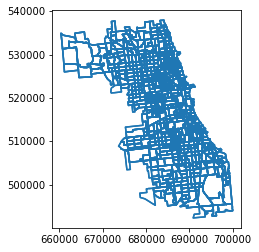

In [5]:
megatract_DF.boundary.plot()

In [6]:
#define projection for megatract: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
megatract_DF.set_crs((shp2010.crs), inplace=True)
print(megatract_DF.crs)

#export megatract
megatract_DF.to_file('C:/Users/mstuhlm1/OneDrive - DePaul University/Research/EnvGentrification/Data/RawCensusData/Megatracts/megatract_output_20210408.shp')

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [46]:
print(shp2010.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [4]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
